<font color = brown>

Done by: Vu Duc Cong

Welcome to my assignment for Aire! In this project, I have focused on cleaning, processing, and analyzing data to derive insights and recommendations for Aire. Through extensive data exploration and segmentation, I aimed to understand customer behavior, platform and channel performance, and operational efficiency.
    
Using a variety of data visualization techniques such as column charts, time-series plots, and pie charts, I delved into the dataset to uncover patterns and trends. By segmenting customers based on their purchasing behavior, I identified different categories and proposed targeted recommendations to retain and engage them effectively.
    
I invite you to explore my analysis and recommendations to gain valuable insights into Aire's customer base and identify opportunities for growth and improvement


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aire-dataset/Data_Analyst_Assignment  (1).xlsx
/kaggle/input/region/region.jpg
/kaggle/input/aire-data-analytic-assignment/__results__.html
/kaggle/input/aire-data-analytic-assignment/__notebook__.ipynb
/kaggle/input/aire-data-analytic-assignment/__output__.json
/kaggle/input/aire-data-analytic-assignment/custom.css
/kaggle/input/aire-data-analytic-assignment/__results___files/__results___40_0.png
/kaggle/input/aire-data-analytic-assignment/__results___files/__results___45_0.png
/kaggle/input/aire-data-analytic-assignment/__results___files/__results___21_0.png
/kaggle/input/aire-data-analytic-assignment/__results___files/__results___30_0.png
/kaggle/input/aire-data-analytic-assignment/__results___files/__results___36_0.jpg
/kaggle/input/aire-data-analytic-assignment/__results___files/__results___32_0.png
/kaggle/input/aire-data-analytic-assignment/__results___files/__results___26_0.png
/kaggle/input/aire-data-analytic-assignment/__results___files/__results___28_0.png


In [2]:
#read the dataset which given in csv format
aire = pd.read_excel("/kaggle/input/aire-dataset/Data_Analyst_Assignment  (1).xlsx")

aire.head()

,order_id,local_order_date,client_order_id,local_client_order_date,client_reference_id,request_delivery_date,payment_type,shipping_type,code_client,code_customer,...,item_type,uom,item_brand,shipment_provider_awb,shipment_provider_awb_label,product_code,client_product_code,product_descr,product_type,product_quantity
0,XEL_XEL00000258,2023-09-01 14:31:15,XEL00000258,2023-09-01 14:30:47,NaN,NaN,NON-COD,REG,XEL,Cust_XEL,...,inventory,Pcs,Aire,NLSGD35679284,https://docs.sellinall.com/uploads/shippingLab...,NaN,NaN,NaN,NaN,NaN
1,XEL_XEL00000259,2023-09-01 16:44:56,XEL00000259,2023-09-01 16:44:30,NaN,NaN,NON-COD,REG,XEL,Cust_XEL,...,inventory,Pcs,Aire,NLSGD35680217,https://docs.sellinall.com/uploads/shippingLab...,NaN,NaN,NaN,NaN,NaN
2,XEL_XEL00000260,2023-09-01 22:53:53,XEL00000260,2023-09-01 22:52:59,NaN,NaN,NON-COD,REG,XEL,Cust_XEL,...,inventory,Pcs,Aire,SPXSG030037587329,https://docs.sellinall.com/uploads/shippingLab...,NaN,NaN,NaN,NaN,NaN
3,XEL_XEL00000261,2023-09-01 23:34:13,XEL00000261,2023-09-01 23:33:44,NaN,NaN,NON-COD,REG,XEL,Cust_XEL,...,inventory,Pcs,Aire,NLSGD35682162,https://docs.sellinall.com/uploads/shippingLab...,NaN,NaN,NaN,NaN,NaN
4,XEL_XEL00000262,2023-09-02 05:24:51,XEL00000262,2023-09-02 05:24:26,NaN,NaN,NON-COD,REG,XEL,Cust_XEL,...,inventory,Pcs,Aire,NLSGD35682577,https://docs.sellinall.com/uploads/shippingLab...,NaN,NaN,NaN,NaN,NaN


# <font color = pink> Data Cleaning and Processing
After looking through the data, I select variables that are insightful to derive stragetic business decision

In [3]:
#Columns that are more insightful to derive insights and recommendation
insight_ful_col = ['order_id','local_order_date','status_so','status_fo_leading','status_sho','shipment_addressee', 'shipment_postalcode','memo','sender_address1','sender_address2','code_item','item_descr','quantity']
aire = aire[insight_ful_col]
aire.head()

,order_id,local_order_date,status_so,status_fo_leading,status_sho,shipment_addressee,shipment_postalcode,memo,sender_address1,sender_address2,code_item,item_descr,quantity
0,XEL_XEL00000258,2023-09-01 14:31:15,FULFILLED,PACKED,INTRANSIT,Chan meow shiang,310122,lazada 105789782246297,19 Loyang Ln 9,Changi Logistics Center,XEL_SKARAPWTM0101,Adult Pull Up Pants (White) - Size M,3
1,XEL_XEL00000259,2023-09-01 16:44:56,FULFILLED,PACKED,INTRANSIT,Goh Hui Fang,750486,lazada 104899281245657,19 Loyang Ln 9,Changi Logistics Center,XEL_SKARAPWTM0101,Adult Pull Up Pants (White) - Size M,1
2,XEL_XEL00000260,2023-09-01 22:53:53,FULFILLED,PACKED,INTRANSIT,H******i,530931,shopee 230901840550AN,19 Loyang Ln 9,Changi Logistics Center,XEL_SKARAPWTL0101,Adult Pull Up Pants (White) - Size L,1
3,XEL_XEL00000261,2023-09-01 23:34:13,FULFILLED,PACKED,INTRANSIT,Joanne Tan,542178,lazada 104915691565366,19 Loyang Ln 9,Changi Logistics Center,XEL_SKARAPWTL0101,Adult Pull Up Pants (White) - Size L,3
4,XEL_XEL00000262,2023-09-02 05:24:51,FULFILLED,PACKED,INTRANSIT,Varsha byloor,486842,lazada 105816157620252,19 Loyang Ln 9,Changi Logistics Center,XEL_SKARAPWTL0101,Adult Pull Up Pants (White) - Size L,2


In [4]:
aire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   order_id             657 non-null    object
 1   local_order_date     657 non-null    object
 2   status_so            657 non-null    object
 3   status_fo_leading    657 non-null    object
 4   status_sho           651 non-null    object
 5   shipment_addressee   657 non-null    object
 6   shipment_postalcode  657 non-null    object
 7   memo                 657 non-null    object
 8   sender_address1      657 non-null    object
 9   sender_address2      616 non-null    object
 10  code_item            657 non-null    object
 11  item_descr           657 non-null    object
 12  quantity             657 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 66.9+ KB


In [5]:
#We see that there are only 651 variables instead of max 657, lets check it out
aire[aire['status_sho'].isna()][['status_so','status_fo_leading']]
# It shows that for order that status_sho is empty field, the order are either closed or cancelled

,status_so,status_fo_leading
146,CANCEL,CANCEL
177,CLOSE,CANCEL
276,CLOSE,CANCEL
603,CLOSE,CANCEL
604,CLOSE,CANCEL
628,CLOSE,CANCEL


In [6]:
#We learn that there are 4 inputs for status_sale order
aire['status_so'].unique()
#To assist futrher EDA, we will seperate orders that FULFILLED and not FULFILLED

array(['FULFILLED', 'CANCEL', 'CLOSE', 'RETURN'], dtype=object)

In [7]:
#Lets create a new data frame for all items are status sale order (status_so) are not "FULFILLED"
not_fulfilled_aire_order = pd.DataFrame(aire[aire['status_so'] != 'FULFILLED'])
# There are 24 rows 
not_fulfilled_aire_order.count()

order_id               24
local_order_date       24
status_so              24
status_fo_leading      24
status_sho             18
shipment_addressee     24
shipment_postalcode    24
memo                   24
sender_address1        24
sender_address2        21
code_item              24
item_descr             24
quantity               24
dtype: int64

In [8]:
#Lets drop all rows which status sale order (status_so) are not "FULFILLED"
aire = aire.drop(aire[aire['status_so'] != 'FULFILLED'].index)
aire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 0 to 656
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   order_id             633 non-null    object
 1   local_order_date     633 non-null    object
 2   status_so            633 non-null    object
 3   status_fo_leading    633 non-null    object
 4   status_sho           633 non-null    object
 5   shipment_addressee   633 non-null    object
 6   shipment_postalcode  633 non-null    object
 7   memo                 633 non-null    object
 8   sender_address1      633 non-null    object
 9   sender_address2      595 non-null    object
 10  code_item            633 non-null    object
 11  item_descr           633 non-null    object
 12  quantity             633 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 69.2+ KB


In [9]:
#Standardise and fillup the value for sender_address1 and sender_address2
aire['sender_address1'] = '19 Loyang Ln, Singapore 508929'

In [10]:
aire['sender_address2'] = 'Changi Logistics Center, Singapore 486045'
aire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 0 to 656
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   order_id             633 non-null    object
 1   local_order_date     633 non-null    object
 2   status_so            633 non-null    object
 3   status_fo_leading    633 non-null    object
 4   status_sho           633 non-null    object
 5   shipment_addressee   633 non-null    object
 6   shipment_postalcode  633 non-null    object
 7   memo                 633 non-null    object
 8   sender_address1      633 non-null    object
 9   sender_address2      633 non-null    object
 10  code_item            633 non-null    object
 11  item_descr           633 non-null    object
 12  quantity             633 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 69.2+ KB


In [11]:
#Same addressee should change to the standard name of "YEAP MEDICAL SUPPLIES PTE LTD"
aire[aire['shipment_addressee'].str.contains('YEAP MEDICAL SUPPLIES PTE LTD', case=False, na=False)]['shipment_addressee']

111                        YEAP MEDICAL SUPPLIES PTE LTD
112                        YEAP MEDICAL SUPPLIES PTE LTD
113                        YEAP MEDICAL SUPPLIES PTE LTD
114                        YEAP MEDICAL SUPPLIES PTE LTD
401                        YEAP MEDICAL SUPPLIES PTE LTD
402                        YEAP MEDICAL SUPPLIES PTE LTD
636    YEAP MEDICAL SUPPLIES PTE LTD\n11 YISHUN INDUS...
637    YEAP MEDICAL SUPPLIES PTE LTD\n11 YISHUN INDUS...
Name: shipment_addressee, dtype: object

In [12]:
# To standardise ship_addressee of 'YEAP MEDICAL SUPPLIES PTE LTD'
aire.loc[[636, 637], 'shipment_addressee'] = 'YEAP MEDICAL SUPPLIES PTE LTD'

To calculate and come up with the recency value in terms of if purchases are made in Dec (most recent) = 4 points, Nov ( 3 points), Oct (2 points), Sept(1 point)


In [13]:
aire[aire['shipment_addressee'].str.contains('YEAP MEDICAL SUPPLIES PTE LTD', case=False, na=False)]['shipment_postalcode'] == 768089
# It shows that the shipment_postalcode can be modified to be consistent to be the same for data analysis

111     True
112     True
113     True
114     True
401    False
402    False
636     True
637     True
Name: shipment_postalcode, dtype: bool

In [14]:
# Update the 'shipment_postalcode' column for rows 401 and 402
aire.loc[[401, 402], 'shipment_postalcode'] = 768089

In [15]:
aire[['code_item','item_descr','quantity']].tail()

,code_item,item_descr,quantity
652,XEL_SKARAPWTL0101,Adult Pull Up Pants (White) - Size L,8
653,XEL_SKARAPWTM0101,Adult Pull Up Pants (White) - Size M,2
654,XEL_SKARAPWTL0101,Adult Pull Up Pants (White) - Size L,3
655,XEL_SKARAPWTL0101,Adult Pull Up Pants (White) - Size L,2
656,XEL_SKARAPWTM0101,Adult Pull Up Pants (White) - Size M,4


# <font color = pink>Explorative Data Analysis (EDA)
In this part, I will analyse the datasets to summarize their main characteristics, often with visual methods to find patterns, spot anomalies, and formulate hypotheses that can drive further insights

In [16]:
# Let's find out how many products are purchased from 01/09/2023 - 31/12/2023 (4 months)
aire.groupby('code_item')[['item_descr','quantity']].sum()

,item_descr,quantity
code_item,,
XEL_SKARAPWTL0101,Adult Pull Up Pants (White) - Size LAdult Pull...,1334
XEL_SKARAPWTM0101,Adult Pull Up Pants (White) - Size MAdult Pull...,1849


There are 3183 products have been sold from 01/09/2023 - 31/12/2023, assuming that if the status_so is FULFILLED, not RETURN, CANCEL or CLOSE, the product is considered sold.
There are 2 types of products sold:
1. Adult Pullup Pants (Size L) with 1334 products
2. Adult Pullup Pants (Size M) with 1849 products

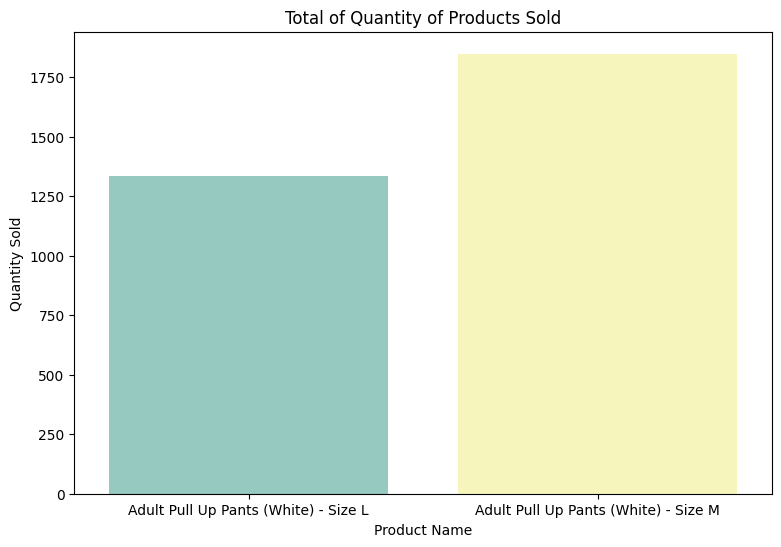

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
#Groupby the product_name in terms of sales
products = aire.groupby('item_descr')['quantity'].sum()


plt.figure(figsize=(9, 6))
sns.barplot(x=products.index, y=products.values,palette="Set3")
plt.title("Total of Quantity of Products Sold")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.show()

***Insight 1: This shows that in terms of quantity purchased, Size M is more popular among consumers***

Now we will be analysing data such as channels customer used to purchase out products, time series of the products and how can we derive relevant insights and business strategic decision

In [18]:
#I created a new purchase_channel data column to categorise which channel does customers purchase our products

# I've used case=False and na=False in str.contains() 
#to handle case-insensitive matching and treat missing values (NaN) as False

conditions = [
    (aire['memo'].str.contains('lazada', case=False, na=False)),
    (aire['memo'].str.contains('shopee', case=False, na=False)),
    (aire['memo'].str.contains('shopify', case=False, na=False)),
    (aire['memo'].str.contains('hao mart', case=False, na=False))
]
values = ['Lazada', 'Shopee', 'Shopify', 'Hao Mart']

# Apply conditions to create a new column
aire['purchase_channel'] = np.select(conditions, values, default='Other')

In [19]:
#Group by to obtain total number of purchases per channel 
aire.groupby('purchase_channel')['quantity'].sum()

purchase_channel
Hao Mart     152
Lazada      1417
Other        561
Shopee       938
Shopify      115
Name: quantity, dtype: int64

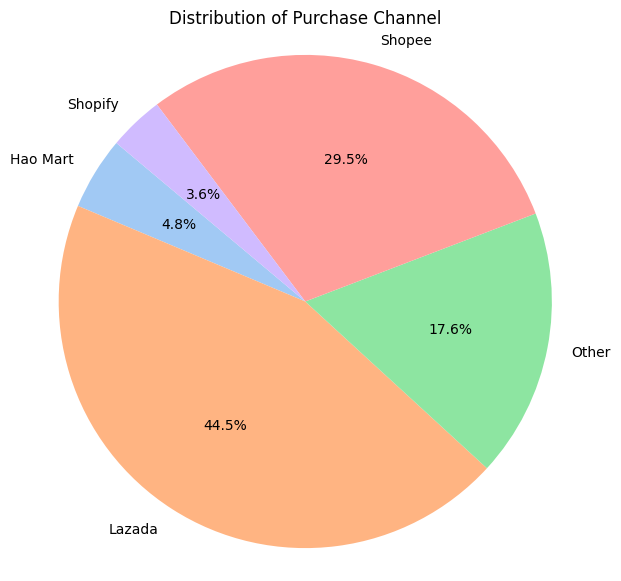

In [20]:
# Present data in a pie chart of what purchase_channel is used in terms of number of purchases
grouped_data = aire.groupby('purchase_channel')['quantity'].sum().tolist()

# Sample data
labels = ['Hao Mart', 'Lazada', 'Other', 'Shopee', 'Shopify']
sizes = grouped_data  # Sample sizes, in percentage

# Define a custom color palette
pastel_palette = sns.color_palette("pastel")

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=pastel_palette)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Distribution of Purchase Channel')

# Display the plot
plt.show()


***Insight 2: Consumers are likely to prefer to use online purchase channel to purchase products from popular online marketplace Lazada and Shopee online. There are a small portion of indicating others (physical purchase through our webiste, phone call, etc)***

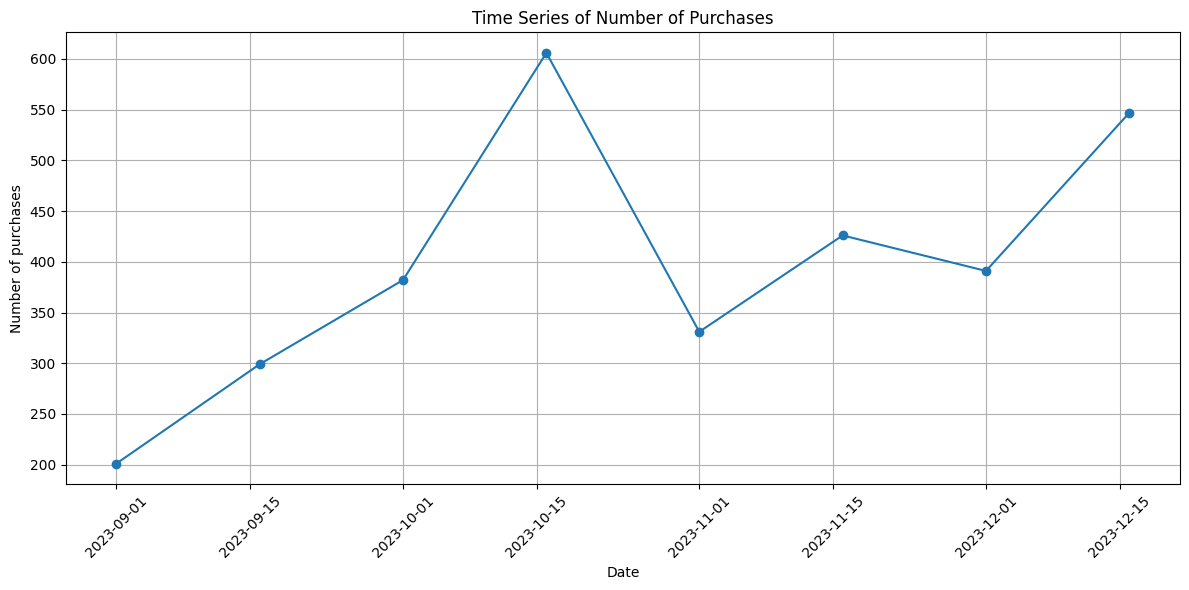

In [21]:
# Create a time series to see the patterns and trends of total number of purchases within 4 months of data
# Convert 'local_order_date' to datetime format
aire['local_order_date'] = pd.to_datetime(aire['local_order_date'])

# Group the data by time periods (1st to 15th and 16th to end of month)
aire['date_period'] = pd.to_datetime(aire['local_order_date'].dt.year.astype(str) + '-' +
                                     aire['local_order_date'].dt.month.astype(str) + '-' +
                                     (aire['local_order_date'].dt.day // 16 * 15 + 1).astype(str))
# aire['time_period']
# Group the data by 'date_period'
time_period_groups = aire.groupby('date_period')

# Calculate the quantity sum for each time period
quantity_sum = time_period_groups['quantity'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(quantity_sum.index, quantity_sum.values, marker='o', linestyle='-')
plt.title('Time Series of Number of Purchases')
plt.xlabel('Date')
plt.ylabel('Number of purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

***Insight 3: The time series of date period against number of purchased has indicated that there are an upward trend begining of the month to mid of the month. This trend applies to all the months. It shows that purchases are made more frequenly during the early part of the month (01/MM - 15/MM)***

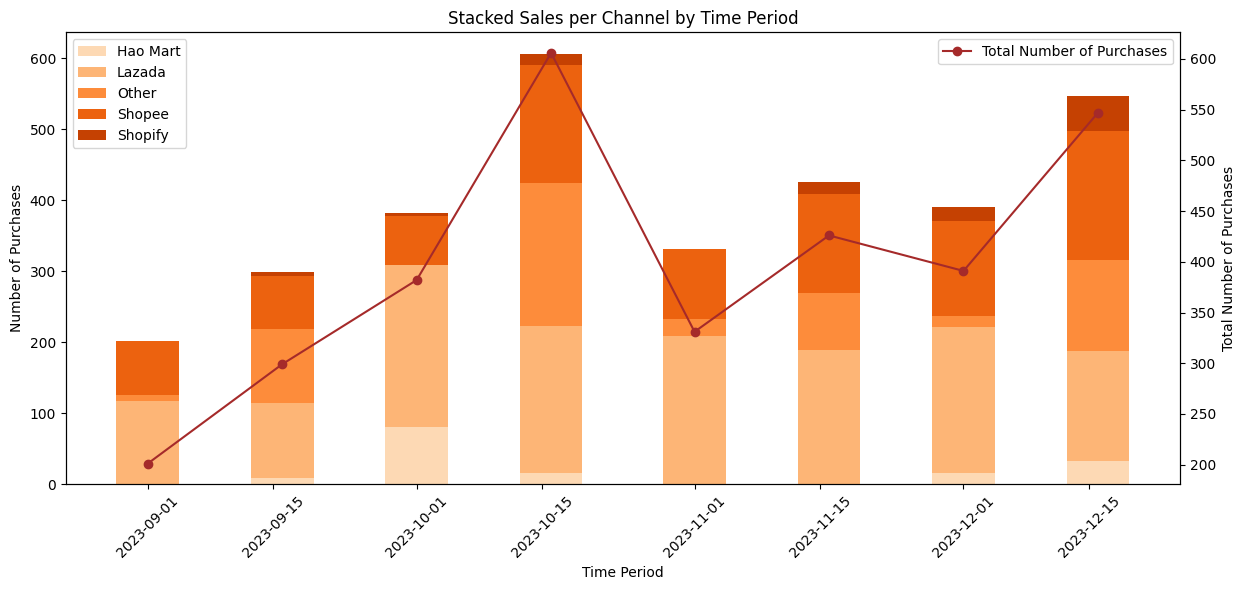

In [22]:
# Integrate the time series of total number of purchases with total number of purchases per channel
# Convert 'local_order_date' to datetime format
aire['local_order_date'] = pd.to_datetime(aire['local_order_date'])

# Bin the data by time periods (1st to 15th and 16th to end of month)
aire['date_period'] = pd.to_datetime(aire['local_order_date'].dt.year.astype(str) + '-' +
                                     aire['local_order_date'].dt.month.astype(str) + '-' +
                                     (aire['local_order_date'].dt.day // 16 * 15 + 1).astype(str))

# Group the data by 'date_period' and 'purchase_channel'
time_channel_groups = aire.groupby(['date_period', 'purchase_channel'])

# Calculate the quantity sum for each time period and channel
quantity_sum_per_channel = time_channel_groups['quantity'].sum().unstack().fillna(0)

# Plot the stacked column chart
plt.figure(figsize=(12, 6))

# Define colors for each channel using different shades of orange
num_channels = len(quantity_sum_per_channel.columns)
colors = plt.cm.Oranges(np.linspace(0.2, 0.8, num_channels))

# Plot the stacked columns
for i, channel in enumerate(quantity_sum_per_channel.columns):
    plt.bar(quantity_sum_per_channel.index, 
            quantity_sum_per_channel[channel], 
            bottom=quantity_sum_per_channel.iloc[:, :i].sum(axis=1),
            color=colors[i],
            label=channel,
            width=7,  # make columns thinner
            align='center')  # align bars at the center of the time periods

plt.title('Stacked Sales per Channel by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Create a time series to see the patterns and trends of total number of purchases within 4 months of data
# Group the data by 'date_period'
time_period_groups = aire.groupby('date_period')

# Calculate the quantity sum for each time period
quantity_sum = time_period_groups['quantity'].sum()

# Plot the time series on a secondary y-axis
plt.twinx()
plt.plot(quantity_sum.index, quantity_sum.values, marker='o', linestyle='-', color='brown', label='Total Number of Purchases')
plt.ylabel('Total Number of Purchases')

# Add legend for the time series plot
plt.legend(loc='upper right')

# Display the plot
plt.show()



<font color = brown>Business Recommendation 1: We can utitlise targeted marketing campaigns at the begining of the month (01/MM - 15/MM) to capitalise on the increased frequency of purchases during that period. I will strongly suggest we run marketing campaign on Lazada and Shoppee which shows in the bar chart that majority number of purchases come from to accquire more consumers and generate even more profits

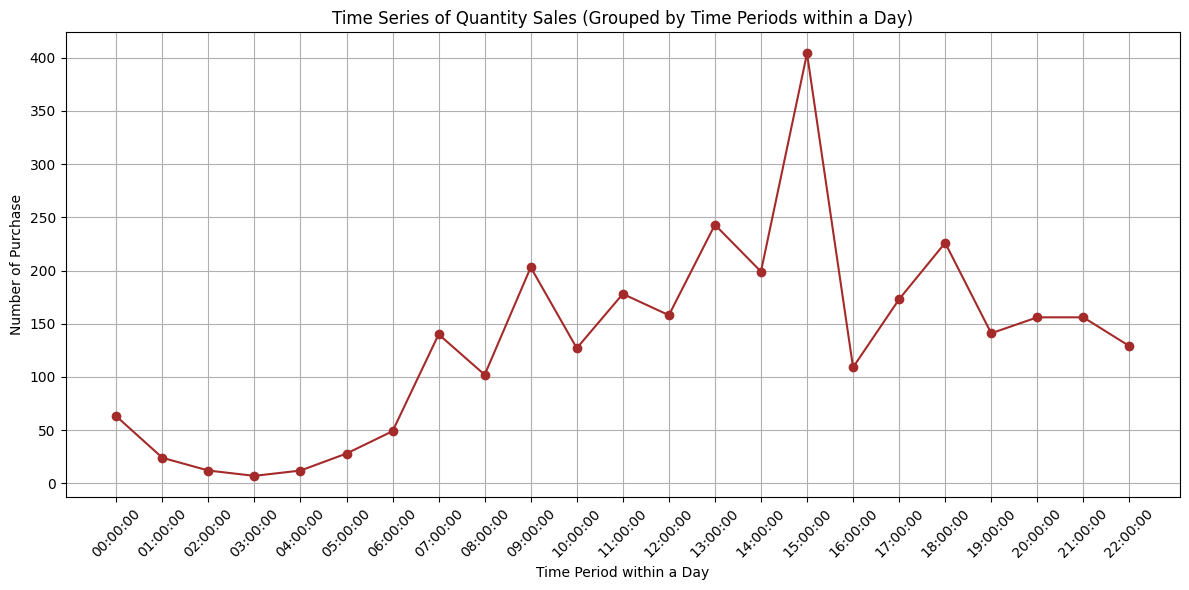

In [23]:
# A scatter plot of different time period within a day against number of purchases
# Convert 'local_order_date' to datetime format
aire['local_order_date'] = pd.to_datetime(aire['local_order_date'])

# Define the start and end times for each time period within a day
time_periods = pd.date_range(start='00:00:00', end='23:59:59', freq='h').time

# Group the data by time periods within a day
aire['time_period'] = pd.cut(aire['local_order_date'].dt.time, bins=time_periods, right=True, labels=time_periods[:-1])

# Calculate the sum of quantities for each time period within a day
quantity_sum = aire.groupby('time_period', observed=False)['quantity'].sum()

# Convert time periods to strings with full 24-hour format
time_period_str = [tp.strftime('%H:%M:%S') for tp in quantity_sum.index]

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_period_str, quantity_sum.values, marker='o',color='brown', linestyle='-')
plt.title('Time Series of Quantity Sales (Grouped by Time Periods within a Day)')
plt.xlabel('Time Period within a Day')
plt.ylabel('Number of Purchase')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


***Insight 4: The scatter plot above shows the different peak hour, showing the time of when there are highest number of purchases recorded (3:00PM). These peak hours represent periods of high customer activity and demand.***

<font color = brown>Business Recommendation 2: Our businesses can optimize their staffing levels (IT support, logistic team, admin team, customer service and support team) based on peak hours. We can schedule more staff during peak hours to handle increased customer traffic efficiently. Conversely, during low-activity periods, they can reduce staff to control costs. In addition, we can make use of the peak by giving out discounts at 2:00 - 3:00 PM to encourage customers to make more purchases on Shopee and Lazada

Next, we will be doing geographical analysis by looking at customer's postal code to see which region in our little island purchases more products and the others

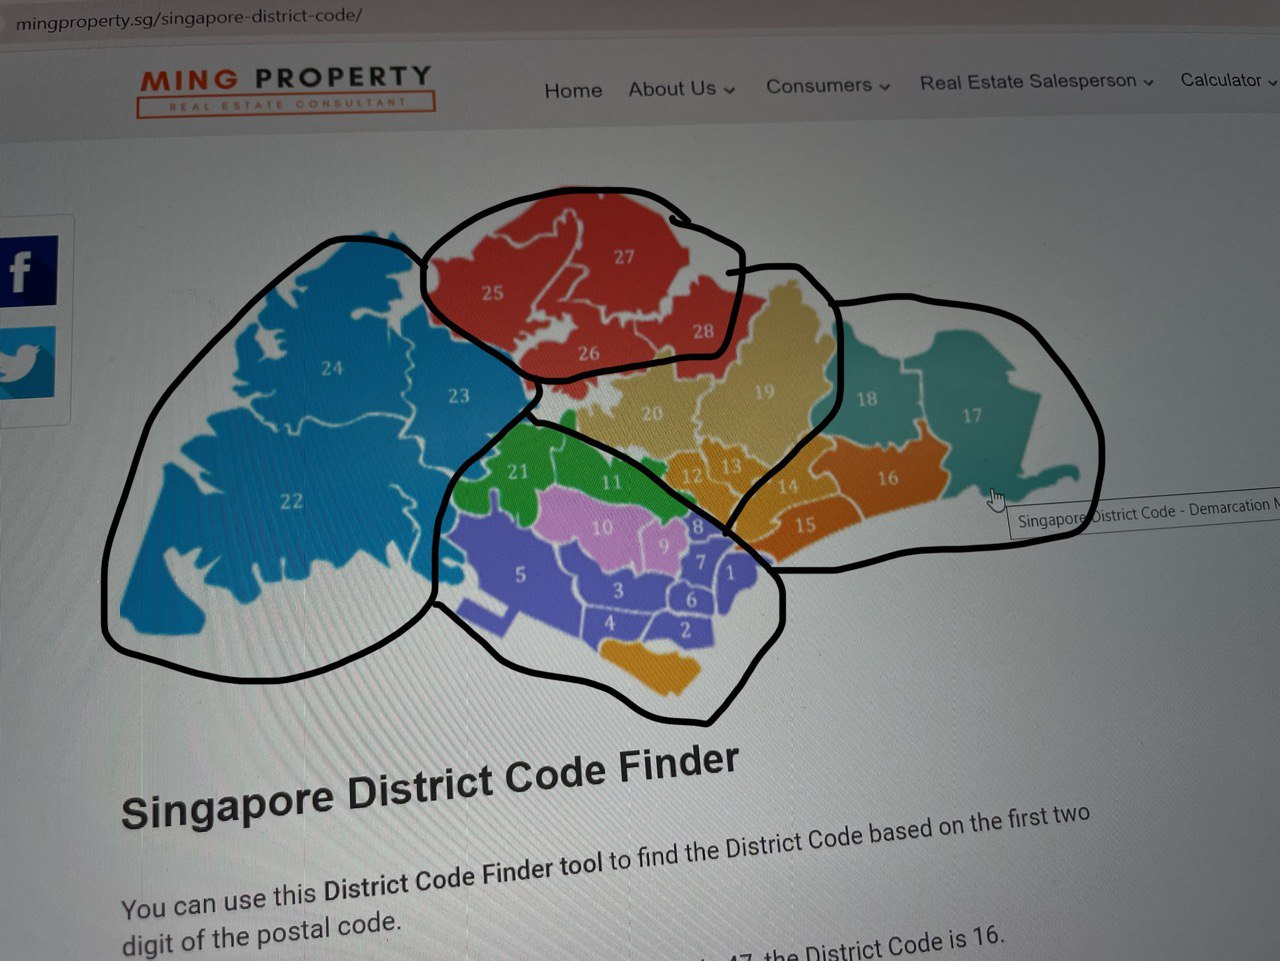

In [24]:
from IPython.display import Image 
import os
Image("/kaggle/input/region/region.jpg")

We will be using the region based on this URL Singapore district code to categorise customer postal code into different region: West, North, North East, Central, East. West region. From customers postal code, the first 2 integer represent postal sector, using the URL link provided, we will match the postal sector to the correspond postal district. West region contains postal district of 24,23 and 22. North region contains postal district of 25,26,27 and 28. North East region contains postal district of 12,13,19 and 20. Central region contains postal district of 1,2,3,4,5,6,7,8,9,10,11 and 21. Lastly, the East region contains postal district of 14,15,16,17 and 18. 

URL: [https://www.mingproperty.sg/singapore-district-code/](http://)

In [25]:
aire['shipment_postalcode'].head()

0    310122
1    750486
2    530931
3    542178
4    486842
Name: shipment_postalcode, dtype: object

In [26]:
#Sort out function to determine the region of each customer's postal code

# Define a function to map postal codes to regions
def map_postalcode_to_region(postalcode):
    try:
        first_two_digits = int(str(postalcode)[:2])
        if 1 <= first_two_digits <= 30 or first_two_digits in [58, 59]:
            return 'central'
        elif 72 <= first_two_digits <= 80:
            return 'north'
        elif 60 <= first_two_digits <= 71:
            return 'west'
        elif (31 <= first_two_digits <= 37) or (53 <= first_two_digits <= 57):
            return 'north-east'
        elif (38 <= first_two_digits <= 52) or (first_two_digits == 81) or (first_two_digits == 82):
            return 'east'
        else:
            return 'unknown'
        
    except ValueError:
        return 'unknown'

# Create the 'region' column by applying the function to the 'shipment_postalcode' column
aire['region'] = aire['shipment_postalcode'].apply(map_postalcode_to_region)

aire['region'].head()


0    north-east
1         north
2    north-east
3    north-east
4          east
Name: region, dtype: object

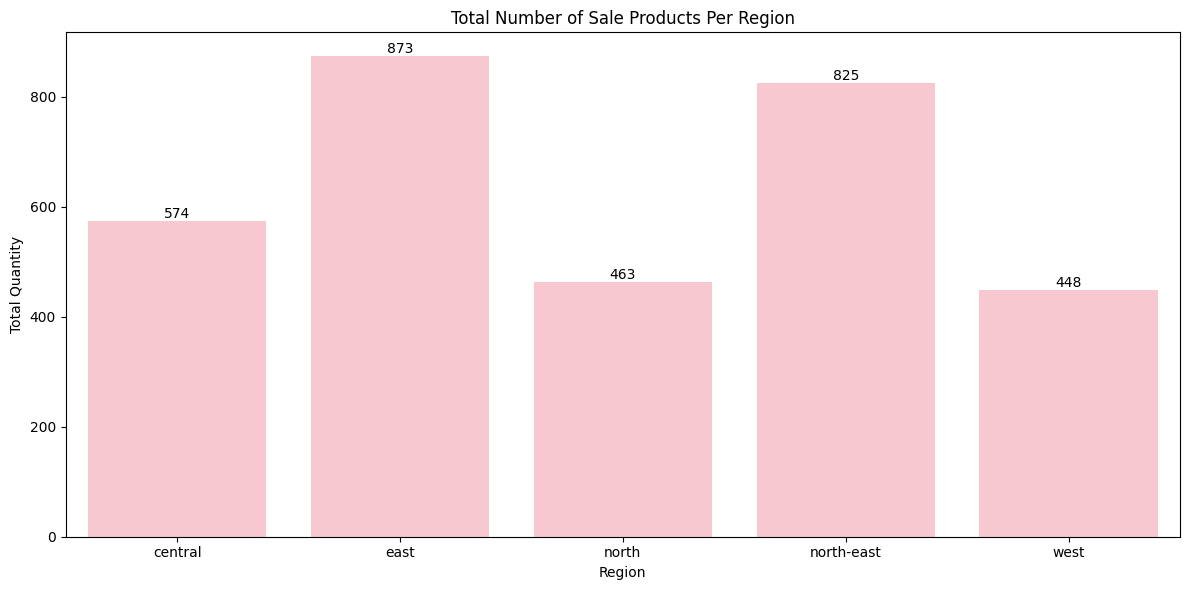

In [27]:

# Groupby the shipment_provider in terms of quantity
top_products = aire.groupby('region')['quantity'].sum()

plt.figure(figsize=(12, 6))

# Define the color you want
bar_color = 'pink'

# Create the bar plot with the specified color
sns.barplot(x=top_products.index, y=top_products.values, color=bar_color)

# Add values on top of each bar
for i, value in enumerate(top_products.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.title("Total Number of Sale Products Per Region")
plt.xlabel("Region")
plt.ylabel("Total Quantity")
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


***Insight 5: According to region column chart, East and North-East are accounted for the most number purchases of our products. Understanding the nature of our products, we can derive that Singapore elderly population is concentrated more at east and north-east region of Singapore***

<font color = brown>
Business Recommendation 3: We can compare our sales data with the existing elderly population in Singapore by region to identify potential areas for targeted marketing efforts. For instance, if the North region has a higher proportion of elderly residents compared to other regions but our sales data shows that it's not the highest in terms of purchases, it suggests an opportunity to focus more on this demographic.

We can implement traditional marketing strategies tailored to senior citizens, such as door-to-door marketing or community center talks. By engaging with this demographic directly and promoting our products in ways that resonate with them, we can potentially increase sales among this group of people.

Next, we will be looking at the the monetary value (amount of money spent by a customer on purchase). In this case, we do not have the exact price of the products. However, we can assume that each product of size L is equal to 2 points and each product size M is equal to 1 points. For instance, Winnie Choo bought 4 pullup pants size L, it will be 2*4 = 8 monetary value. Monetary value is an important metric for businesses as it helps in understanding customer purchasing behavior, identifying high-value customers, and targeting marketing efforts effectively

In [28]:
# Value (Monetary) total value of each customer purchases
# Conditionally assign values to the 'Total_Value' column
# Based on the products size customers purchases, for each M size bought, it is 1 moneyratu value 
import numpy as np

aire['MonetaryValue'] = np.where(aire['item_descr'].str.contains('Size L', case=False, na=False), 2 * aire['quantity'],
                             np.where(aire['item_descr'].str.contains('Size M', case=False, na=False), 1 * aire['quantity'], 0))


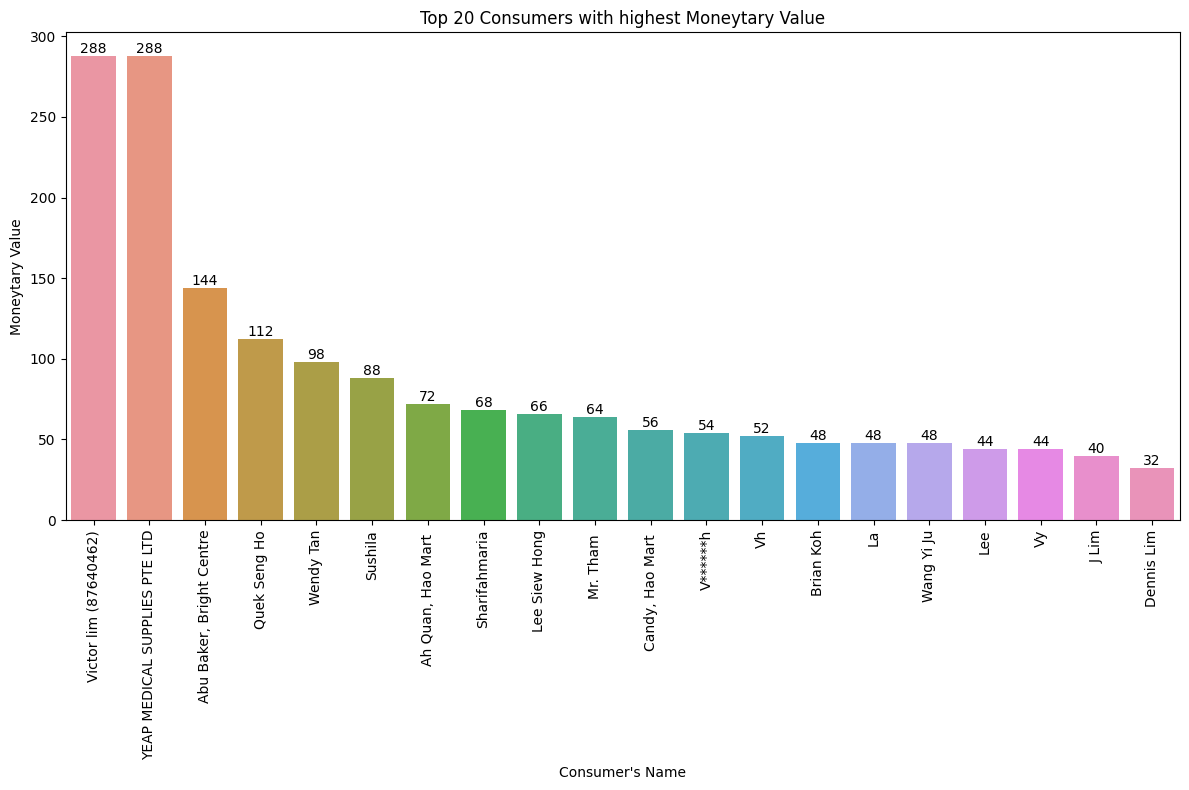

In [29]:
# Groupby the product_name in terms of monetary value of top 20 consumers
top_20_consumers = aire.groupby('shipment_addressee')['MonetaryValue'].sum().nlargest(20)

# Convert index to a list
consumer_names = top_20_consumers.index

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=consumer_names, y=top_20_consumers.values)

# Add values on top of each column
for index, value in enumerate(top_20_consumers):
    barplot.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.title("Top 20 Consumers with highest Moneytary Value")
plt.xlabel("Consumer's Name")
plt.ylabel("Moneytary Value")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

***Insight 6:
The column chart will show which customers contribute the most to the company's revenue.
By understanding revenue distribution, it will highlight how revenue is distributed among different customers, allowing us to come up with a proactive retention strategy to keep customers with our brand.***

# <font color = pink> Customer Segmentation using RFM Analysis

Now, for this segment, we will delve deeper into Recency, Frequency and MonetaryValue Analysis. RFM analysis involves categorizing customers based on these three metrics to identify different segments of customers. Each customer is assigned a score for recency, frequency, and monetary value, and then these scores are combined to create segments. For example, customers with high recency, frequency, and monetary value scores are considered the most valuable, while those with low scores in all three areas are considered less valuable.

RFM analysis helps businesses understand customer behavior, identify their most valuable customers, and tailor marketing strategies to different customer segments. It's widely used in customer relationship management (CRM), marketing, and e-commerce to improve customer retention, increase sales, and maximize profitability.

Currently, the our data frame has rows that records shipment_addressee multiple times ( one customers can have more than 1 records as long as they make a different purchase each day, it will be recorded as a new record. Thus, Creating a new DataFrame will aggregate all the relevant information about each customer. 

In [30]:
# Calculate frequency of purchases for each customer
purchase_frequency = aire.groupby('shipment_addressee').size()

In [31]:
# Calculate monetary value of purchases for each customer
monetary_value = aire.groupby('shipment_addressee')['MonetaryValue'].sum()
monetary_value

shipment_addressee
1******7         16
A******N          5
A******a          2
A******e          8
A******g          4
                 ..
toh Sock koon     2
wong yoke lin     2
yann              8
yh                1
yhf              18
Name: MonetaryValue, Length: 420, dtype: int64

In [32]:
# Calculate time since last purchase for each customer
# Find the last date within the data
last_date_within_data = aire['date_period'].max()

# Calculate last purchase date for each customer
last_purchase_date = aire.groupby('shipment_addressee')['date_period'].max()

# Use the last date within the data as the reference date
today = last_date_within_data

# Calculate time since last purchase for each customer
time_since_last_purchase = today - last_purchase_date

In [33]:
# Convert time_since_last_purchase to timedelta if it's not already
time_since_last_purchase = pd.to_timedelta(time_since_last_purchase)

# Convert time_since_last_purchase to integer number of days
time_since_last_purchase_days = time_since_last_purchase.dt.days.astype(int)

# Create a DataFrame with unique customers
aire1 = pd.DataFrame({
    'customer_name': monetary_value.index,  # index gives the unique customer names
    'monetary_value': monetary_value.values,
    'purchase_frequency': purchase_frequency.values,
    'last_purchase_date': last_purchase_date.values,
    'time_since_last_purchase(days)': time_since_last_purchase_days.values
})

aire1.tail()

,customer_name,monetary_value,purchase_frequency,last_purchase_date,time_since_last_purchase(days)
415,toh Sock koon,2,1,2023-12-01,15
416,wong yoke lin,2,1,2023-11-16,30
417,yann,8,1,2023-10-16,61
418,yh,1,1,2023-10-16,61
419,yhf,18,1,2023-11-01,45


Now since the range of monetary_value, purchase_frequency and time_since_last_purchase(days) are in different range, lets transform the data before training the model

In [34]:
from sklearn.preprocessing import StandardScaler

# Assuming you have your features in a DataFrame 'aire1'
features = aire1[['monetary_value', 'purchase_frequency', 'time_since_last_purchase(days)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Print the scaled features DataFrame
print(scaled_features_df)


     monetary_value  purchase_frequency  time_since_last_purchase(days)
0          0.216172           -0.480957                        1.768509
1         -0.237171            0.467409                        0.473977
2         -0.360810           -0.480957                        1.336998
3         -0.113532           -0.480957                        1.336998
4         -0.278384           -0.480957                        1.768509
..              ...                 ...                             ...
415       -0.360810           -0.480957                       -0.849323
416       -0.360810           -0.480957                       -0.417812
417       -0.113532           -0.480957                        0.473977
418       -0.402023           -0.480957                        0.473977
419        0.298598           -0.480957                        0.013699

[420 rows x 3 columns]


Now: I need to label the data in the way that I can categorise out customers into 3 different categories: high-value, medium-value and low-value

In [35]:
# Label customers based on common threshold for standardized values
aire1['customer_category'] = 'low-value'  # Default label

# High-value customers
aire1.loc[(aire1['monetary_value'] > 1) & 
          (aire1['purchase_frequency'] > 1) & 
          (aire1['time_since_last_purchase(days)'] > 1), 'customer_category'] = 'high-value'

# Medium-value customers
aire1.loc[((aire1['monetary_value'] <= 1) & (aire1['monetary_value'] >= -1)) & 
          ((aire1['purchase_frequency'] <= 1) & (aire1['purchase_frequency'] >= -1)), 'customer_category'] = 'medium-value'

# Print the count of customers in each category
print(aire1['customer_category'].value_counts())



customer_category
low-value       251
high-value       88
medium-value     81
Name: count, dtype: int64


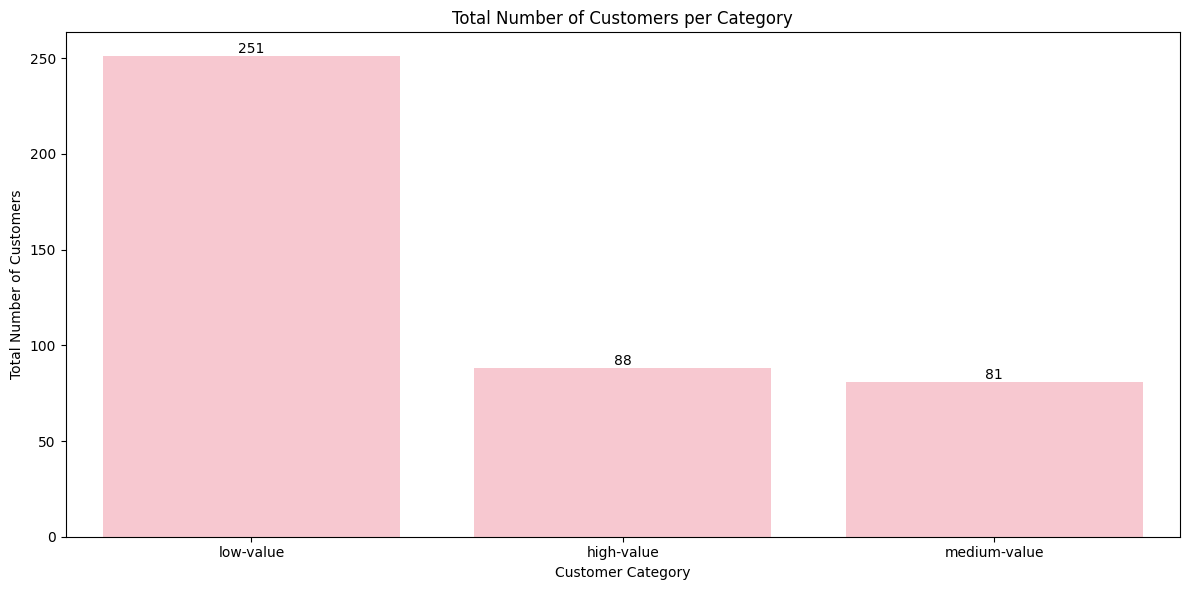

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Customer_category column chart
products = aire1['customer_category'].value_counts()

plt.figure(figsize=(12, 6))

# Define the color you want
bar_color = 'pink'

# Create the bar plot with the specified color
sns.barplot(x=products.index, y=products.values, color=bar_color)

# Add values on top of each bar
for i, value in enumerate(products.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.title("Total Number of Customers per Category")
plt.xlabel("Customer Category")
plt.ylabel("Total Number of Customers")

# Adjust the layout
plt.tight_layout()

plt.show()



***Insight 7a on high-value customers: customers with a standardised monetary value greater than 1 have spending levels approximately 84.13% higher than the mean spending of customers in the dataset. Similarly,customers with a standardised purchase frequency greater than 1 make purchases approximately 84.13% more often than the average customer.Thirdly, customers with a standardised time since last purchase greater than 1 make purchases approximately 84.13% more frequently than the average customer, with shorter intervals between transactions***


***Insight 7b on high-value customers: High-value customers represent a small but significant portion of customers who contribute significantly to our revenue.
These customers exhibit both high spending and high activity levels, making frequent purchases with substantial monetary value.
They are likely to be loyal customers who regularly engage with the business, possibly indicating a strong brand affinity or reliance on the products or services offered.***

<font color = brown>Business Recommendation 4: For high-value customers, it's crucial to offer VIP treatment to maintain their loyalty. Providing special treatment and exclusive offers tailored to their preferences can make them feel valued and appreciated, encouraging them to continue doing business with the our company. Additionally, implementing reward programs specifically designed for high-value customers can further incentivize their continued spending and strengthen their loyalty to the brand.


***Insight 8a on medium-value customers: Customers with a standardized monetary value between -1 and 1 have spending levels within approximately 68.27% above and below the mean spending of customers in the dataset. Secondly, customers with a standardized purchase frequency between -1 and 1 make purchases at a frequency within approximately 68.27% above and below the average customer.***


***Insight 8b on medium-value customers represent the bulk of the customer base and exhibit average spending and activity levels. They make purchases with a frequency and monetary value close to the average customer, indicating a moderate level of engagement with the business. These customers may include occasional shoppers or those who make purchases as needed rather than on a regular basis. Since their spending and activity levels are average, their purchasing behavior may not be strongly influenced by the time since their last purchase. Unlike high-value customers who make frequent purchases, medium-value customers may not show a consistent pattern in their purchase intervals. Therefore, time since the last purchase is not considered a significant factor in determining their category. Focusing on their spending and purchase frequency provides a clearer understanding of their engagement with the business.***

<font color = brown>Business Recommendation 5: Medium-value customers represent a significant portion of the customer base, and targeting them with personalized promotions can be highly effective. Offering promotions based on their past purchases can encourage them to buy more frequently and increase their overall spending. Furthermore, providing customer education through informative content helps them understand products better, enabling them to make more informed purchasing decisions.


***Insight 9 on low-value customers: As default, customers will be categorised as low-value customers unless then meet or exceeds the threshold created above.Low-value customers represent a significant portion of the customer base but contribute less to revenue.They may have infrequent purchases, low spending, or both, indicating minimal engagement with the business.These customers may include one-time buyers, bargain hunters, or those with minimal brand loyalty.***

<font color = brown>Business Recommendation 6: I believe that reactivating low-value customers is essential for maximizing revenue potential. Creating targeted reactivation campaigns can bring back inactive customers by offering them special deals or discounts. By providing incentives tailored to their needs, such as exclusive discounts or freebies, low-value customers can be encouraged to make additional purchases, thereby increasing their overall value to the business.

<font size="4" color = skyblue>*Thank you for taking the time to review my analysis of the Aire data. Through this project, I have gained valuable insights into customer behavior, platform and channel performance, and operational efficiency. I hope this analysis is insightful and provides you with very feasible and relevant recommendations. Implementing these recommendations could significantly contribute to achieving Aire's business objectives. I am eager to discuss my findings further and explore how I can contribute to Aire's success. I hope to be selected for an interview and chosen for the business analytics role for this summer's internship*